## Дискретные случайные величины. Закон распределения вероятностей. Биномиальный закон распределения. Распределение Пуассона

In [17]:
import numpy as np
import pandas as pd

### Задача 1
Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

Биномиальный закон распределения описывается __формулой Бернулли__:
$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

Где __число сочетаний из $n$ по $k$__:
$$C_n^k = \dfrac{A_n^k}{P_k} =  \dfrac{n!}{k! (n - k)!}$$

In [18]:
n = 5 #Количество вопросов
p = 0.25 #Вероятность угадать ответ

Число сочетаний вычислим по формуле:

In [19]:
def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

Формула Бернулли будет иметь вид:

In [20]:
def bernulli(n: int, k: int, p: float) -> float:
    """Формула Бернулли.
    """
    
    return combinations(n, k) * np.power(p, k) * np.power(1-p, n-k)

Вычислим вероятность по формуле Бернули с количеством правильно угаданных ответов:

In [21]:
probabilities = []
for i in range(0, 6):
    probabilities.append(bernulli(n, i, p))
probabilities

[0.2373046875,
 0.3955078125,
 0.263671875,
 0.087890625,
 0.0146484375,
 0.0009765625]

Итак, закон распределения такой случайной величины:

<table border="3">
    <tr>
        <th>$x$</th>
        <td>0</td>
        <td>1</td>
        <td>2</td>
        <td>3</td>
        <td>4</td>
        <td>5</td>
    </tr>
    <tr>
        <th>$P(X = x)$</th>
        <td>0.2373046875</td>
        <td>0.3955078125</td>
        <td>0.263671875</td>
        <td>0.087890625</td>
        <td>0.0146484375</td>
        <td>0.0009765625</td>
    </tr>
</table>

In [22]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

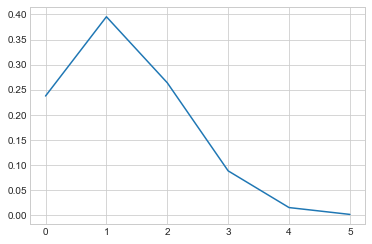

In [23]:
plt.plot(probabilities)
plt.show()

Математическое ожидание и дисперсию для биномиально распределённой дискретной величины можно вычислить по формулам:
$$M(X) = np, \: D(X) = np(1 - p).$$

In [24]:
M_x = n * p
M_x

1.25

In [25]:
D_x = n * p * (1 - p)
D_x

0.9375

### Задача 2
Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

__Формула Пуассона__:
$$P(X = k) = \dfrac{\lambda^k e^{-\lambda}}{k!}$$

In [26]:
def poisson_proba(k: int, lambda_: float) -> float:
    """Формула Пуассона.
    """
    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

In [27]:
lambda_ = 10
p = 0.95

Сложим несколько вероятностей. Воспользуемся примером из лекции про автобусы, где искали вероятность получить не более 15 автобусов.

In [28]:
sum(poisson_proba(k=i, lambda_=lambda_) for i in range(16))

0.9512595966960214

Как видим вероятность нас утсраивает, но нам необходимо N писем для этой вероятности, поэтому поступим следующим образом (воспользуемся простым перебором):

In [29]:
prob = 0
N = 0
while prob <= p:
    prob += poisson_proba(k=N, lambda_=lambda_)
    N += 1
print(f'C вероятностью 0.95 пользователь получит не более {N-1} писем со спамом за текущий день.')

C вероятностью 0.95 пользователь получит не более 15 писем со спамом за текущий день.


### Задача 3
Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка: 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

####  Воспользуемся законом распределения случайных величин

Пусть имеется некоторое событие $A$, которое наступает с вероятностью $p$. __Биномиальный закон__ описывает распределение случайной величины $X$, задающей число наступлений события $A$ в ходе проведения $n$ независимых опытов.

Биномиальный закон распределения описывается __формулой Бернулли__:
$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

In [30]:
def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

In [31]:
def bernulli(n: int, k: int, p: float) -> float:
    """Формула Бернулли.
    """
    
    return combinations(n, k) * np.power(p, k) * np.power(1-p, n-k)

Мы знаем, что сумма вероятностей случайной величины всегда равна $1$. Значит, вероятность получить 6 или более раз равна:
$$P(X \geq 6) = 1 - P(X < 6)$$

In [32]:
p = 0.01
k = 6
n = 6
P = 0
while (P < 0.9):
    P_n = sum(bernulli(n, k, p) for k in range(6))
    P = (1 - P_n)
    n += 1
print(f'Нужно сделать {n-1} выстрелов, чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание!')

Нужно сделать 926 выстрелов, чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание!
